<h1>Car accident analysis</h1>
by Pietro Messina

Let's proceed with the import of the libraries that we are going to use:

In [22]:
import pandas as pd
import pylab as pl
import numpy as np
from datetime import datetime as dt
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import LinearRegression

Let's proceed by viewing all the columns in order to choose the most useful ones for our purpose:

In [23]:
df = pd.read_csv('Data-Collisions.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

We define a subset of data with the columns we have chosen. Let's see the new dataset:

In [24]:
dfmini = df.reindex(columns=['X', 'Y', 'SEVERITYCODE', 'PERSONCOUNT', 'PEDCOUNT', 'VEHCOUNT', 'WEATHER', 'INCDATE', 'ROADCOND', 'LIGHTCOND', 'UNDERINFL'])
dfmini

,X,Y,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,VEHCOUNT,WEATHER,INCDATE,ROADCOND,LIGHTCOND,UNDERINFL
0,-122.323148,47.703140,2,2,0,2,Overcast,2013/03/27 00:00:00+00,Wet,Daylight,N
1,-122.347294,47.647172,1,2,0,2,Raining,2006/12/20 00:00:00+00,Wet,Dark - Street Lights On,0
2,-122.334540,47.607871,1,4,0,3,Overcast,2004/11/18 00:00:00+00,Dry,Daylight,0
3,-122.334803,47.604803,1,3,0,3,Clear,2013/03/29 00:00:00+00,Dry,Daylight,N
4,-122.306426,47.545739,2,2,0,2,Raining,2004/01/28 00:00:00+00,Wet,Daylight,0
...,...,...,...,...,...,...,...,...,...,...,...
194668,-122.290826,47.565408,2,3,0,2,Clear,2018/11/12 00:00:00+00,Dry,Daylight,N
194669,-122.344526,47.690924,1,2,0,2,Raining,2018/12/18 00:00:00+00,Wet,Daylight,N
194670,-122.306689,47.683047,2,3,0,2,Clear,2019/01/19 00:00:00+00,Dry,Daylight,N
194671,-122.355317,47.678734,2,2,0,1,Clear,2019/01/15 00:00:00+00,Dry,Dusk,N


We delete all the rows contain null values ​​(NaN values):

In [25]:
dfmini = dfmini.dropna()

We check if there are actually no more null values:

In [26]:
print('Nan value in X:', dfmini['X'].isnull().sum())
print('Nan value in Y:', dfmini['Y'].isnull().sum())
print('Nan value in SEVERITYCODE:', dfmini['SEVERITYCODE'].isnull().sum())
print('Nan value in PERSONCOUNT:', dfmini['PERSONCOUNT'].isnull().sum())
print('Nan value in PEDCOUNT:', dfmini['PEDCOUNT'].isnull().sum())
print('Nan value in VEHCOUNT:', dfmini['VEHCOUNT'].isnull().sum())
print('Nan value in WEATHER:', dfmini['WEATHER'].isnull().sum())
print('Nan value in INCDATE:', dfmini['INCDATE'].isnull().sum())
print('Nan value in ROADCOND:', dfmini['ROADCOND'].isnull().sum())
print('Nan value in LIGHTCOND:', dfmini['LIGHTCOND'].isnull().sum())
print('Nan value in UNDERINFL:', dfmini['UNDERINFL'].isnull().sum())

Nan value in X: 0
Nan value in Y: 0
Nan value in SEVERITYCODE: 0
Nan value in PERSONCOUNT: 0
Nan value in PEDCOUNT: 0
Nan value in VEHCOUNT: 0
Nan value in WEATHER: 0
Nan value in INCDATE: 0
Nan value in ROADCOND: 0
Nan value in LIGHTCOND: 0
Nan value in UNDERINFL: 0


We replace the "N" and "Y" values ​​with zero and one in order to have uniform values:

In [27]:
dfmini['UNDERINFL'].replace("N", "0", inplace = True)
dfmini['UNDERINFL'].replace("Y", "1", inplace = True)

Verification of the types of columns:

In [29]:
dfmini.dtypes

X               float64
Y               float64
SEVERITYCODE      int64
PERSONCOUNT       int64
PEDCOUNT          int64
VEHCOUNT          int64
WEATHER          object
INCDATE          object
ROADCOND         object
LIGHTCOND        object
UNDERINFL        object
dtype: object

Setting the date (datetime) column with day precision:

In [30]:
dfmini["INCDATE"] = pd.to_datetime(dfmini["INCDATE"])
dfmini["INCDATE"] = dfmini["INCDATE"].dt.date
dfmini

,X,Y,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,VEHCOUNT,WEATHER,INCDATE,ROADCOND,LIGHTCOND,UNDERINFL
0,-122.323148,47.703140,2,2,0,2,Overcast,2013-03-27,Wet,Daylight,0
1,-122.347294,47.647172,1,2,0,2,Raining,2006-12-20,Wet,Dark - Street Lights On,0
2,-122.334540,47.607871,1,4,0,3,Overcast,2004-11-18,Dry,Daylight,0
3,-122.334803,47.604803,1,3,0,3,Clear,2013-03-29,Dry,Daylight,0
4,-122.306426,47.545739,2,2,0,2,Raining,2004-01-28,Wet,Daylight,0
...,...,...,...,...,...,...,...,...,...,...,...
194668,-122.290826,47.565408,2,3,0,2,Clear,2018-11-12,Dry,Daylight,0
194669,-122.344526,47.690924,1,2,0,2,Raining,2018-12-18,Wet,Daylight,0
194670,-122.306689,47.683047,2,3,0,2,Clear,2019-01-19,Dry,Daylight,0
194671,-122.355317,47.678734,2,2,0,1,Clear,2019-01-15,Dry,Dusk,0


Let's create a pivot table to observe which climatic condition affects the most accidents to people, pedestrians and vehicles:

In [32]:
dfpivot = pd.pivot_table(df, values=['PERSONCOUNT', 'PEDCOUNT', 'VEHCOUNT'], index=['WEATHER'], aggfunc=np.sum, fill_value=0)
dfpivot

,PEDCOUNT,PERSONCOUNT,VEHCOUNT
WEATHER,,,
Blowing Sand/Dirt,1,126,113
Clear,4206,277765,219713
Fog/Smog/Smoke,24,1307,1080
Other,24,1723,1627
Overcast,1047,68753,54493
Partly Cloudy,0,13,10
Raining,1707,83284,64640
Severe Crosswind,0,55,43
Sleet/Hail/Freezing Rain,6,275,215


Pivot sorted:

In [33]:
dfpivotsorted = dfpivot.sort_values(['PEDCOUNT'], ascending=False, axis=0)
dfpivotsorted

,PEDCOUNT,PERSONCOUNT,VEHCOUNT
WEATHER,,,
Clear,4206,277765,219713
Raining,1707,83284,64640
Overcast,1047,68753,54493
Unknown,182,30842,29848
Fog/Smog/Smoke,24,1307,1080
Other,24,1723,1627
Snowing,23,2140,1793
Sleet/Hail/Freezing Rain,6,275,215
Blowing Sand/Dirt,1,126,113


This graph displays accidents (pivot table) based on weather conditions:

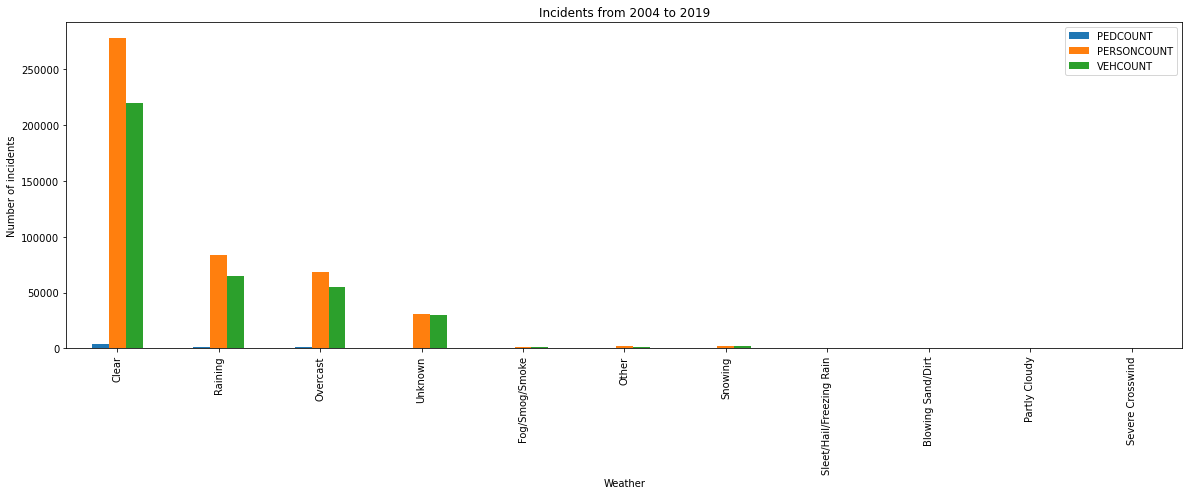

In [34]:
dfpivotsorted.plot(kind='bar', figsize=(20, 6))

plt.xlabel('Weather') # add to x-label to the plot
plt.ylabel('Number of incidents') # add y-label to the plot
plt.title('Incidents from 2004 to 2019') # add title to the plot

plt.show()

Below is a pie chart that highlights the four most dangerous weather situations:

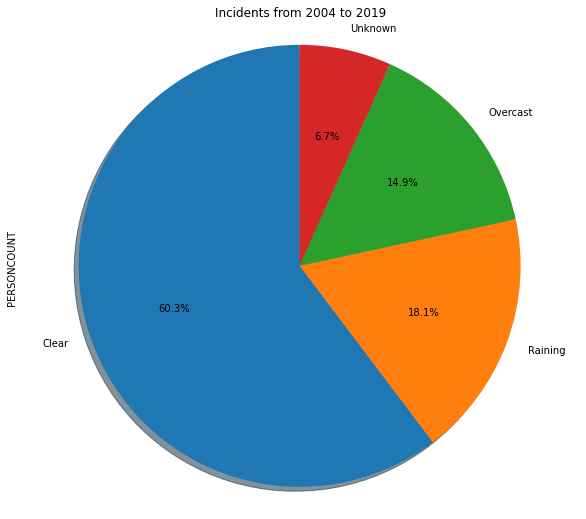

In [35]:
df2 = dfpivotsorted.head(4)
df2['PERSONCOUNT'].plot(kind='pie',
                            figsize=(10, 9),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Incidents from 2004 to 2019')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

Linear regression and prediction:

In [42]:
X = dfmini.iloc[:, 2].values.reshape(-1, 1)  # values converts it into a numpy array
Y = dfmini.iloc[:, 5].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
Y_pred


array([[1.90198704],
       [2.00503301],
       [2.00503301],
       ...,
       [1.90198704],
       [1.90198704],
       [2.00503301]])

We split the database into three parts and calculate the regression model to determine the correlation between the PERSONCOUNT and UNDERINFL variables:

In [37]:
X = pd.DataFrame(dfmini['PERSONCOUNT'])
y = pd.DataFrame(dfmini['UNDERINFL'])
model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
 model.fit(X.iloc[train,:], y.iloc[train,:])
 score = model.score(X.iloc[test,:], y.iloc[test,:])
 scores.append(score)
print(scores)

[0.00046160848415111033, 0.00032322613981727866, 0.000602270230692481]


We note how the correlation is almost zero. Therefore the variables involved are not dependent on each other.
Taking the variable degree of severity of the accident and the drivers in an altered state of consciousness we notice how the situation changes very little. However it is greater than before:

In [38]:
X = pd.DataFrame(dfmini['SEVERITYCODE'])
y = pd.DataFrame(dfmini['UNDERINFL'])
model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
 model.fit(X.iloc[train,:], y.iloc[train,:])
 score = model.score(X.iloc[test,:], y.iloc[test,:])
 scores.append(score)
print(scores)

[0.0014649152292338652, 0.0017240418236708077, 0.002288182844122133]


<h1>Conclusions</h1>

Contrary to what was expected, accidents are not related to the type of driver in an altered state or not, but to the danger of drivers in the best climatic conditions. Inattention and the feeling of lack of danger is more dangerous than the meteorological danger!